In [22]:
library(psych)

setwd('/moochie/Cat/Aggregate_anats/GMD_ML/doc')
data<-read.csv('subject_info.csv')
colnames(data)

[1] "X"                      "freesurferID"           "SubjectID"             
 [4] "Study"                  "Sequence.Version"       "Potentially.Usable"    
 [7] "in_analysis"            "Same.Kid.as."           "Dx_Group"              
[10] "Age_yrs"                "Age_mos"                "male"                  
[13] "MAP_Temper_Loss"        "MAP_Noncompliance"      "MAP_General_Aggression"
[16] "MAP_Low_Concern"        "CT_QC"                  "DB_factor"

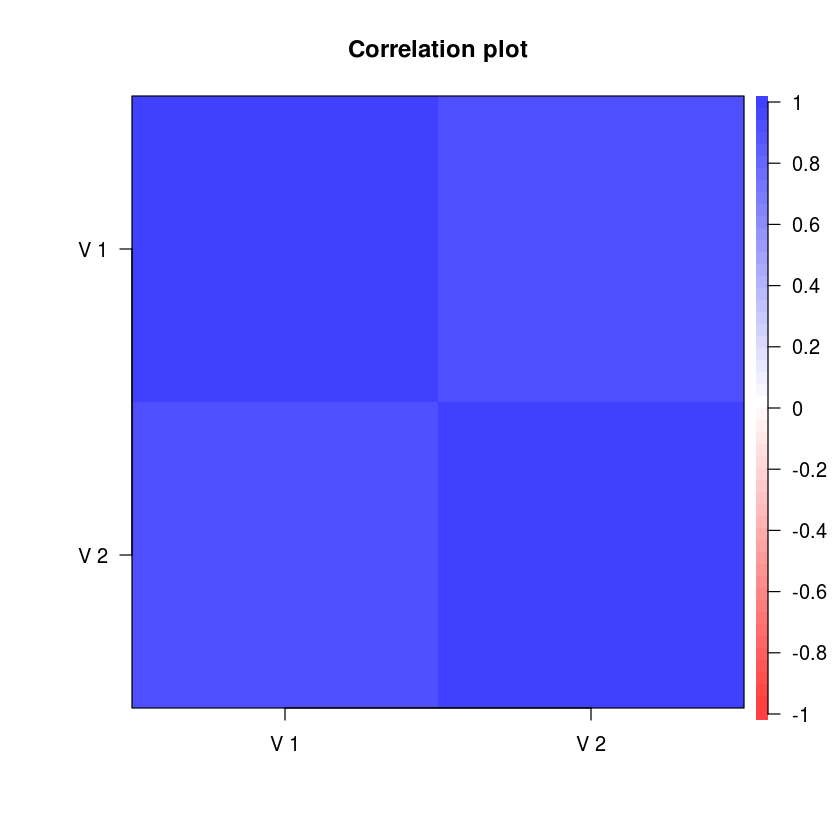

In [23]:
features<-cbind(data$MAP_Temper_Loss,data$MAP_General_Aggression)
features<-scale(features, scale=TRUE)

cor.plot(features)

cor_mtx <-cor(features)

Parallel analysis suggests that the number of factors =  1  and the number of components =  1 


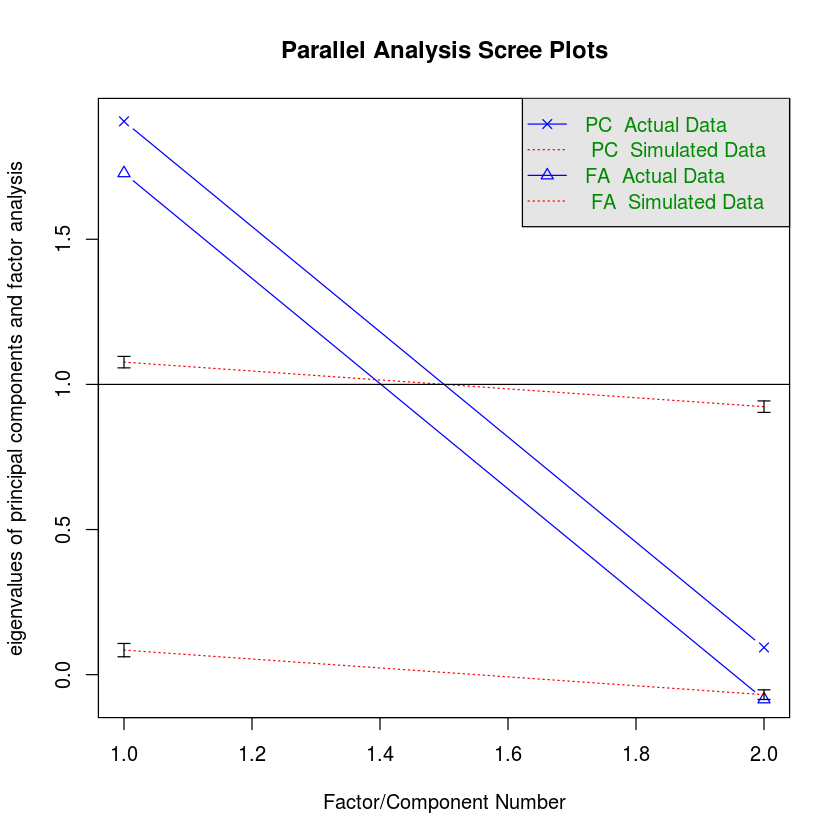

In [24]:
fa.parallel(cor_mtx, fa='both', n.obs=124,fm='ml', SMC=TRUE, error.bars=TRUE,se.bars=TRUE)

In [25]:
model <- fa(features,1,fm='ml',rotate='varimax')
model

Factor Analysis using method =  ml
Call: fa(r = features, nfactors = 1, rotate = "varimax", fm = "ml")
Standardized loadings (pattern matrix) based upon correlation matrix
   ML1   h2    u2 com
1 0.95 0.91 0.094   1
2 0.95 0.91 0.094   1

                ML1
SS loadings    1.81
Proportion Var 0.91

Mean item complexity =  1
Test of the hypothesis that 1 factor is sufficient.

The degrees of freedom for the null model are  1  and the objective function was  1.72 with Chi Square of  209.27
The degrees of freedom for the model are -1  and the objective function was  0 

The root mean square of the residuals (RMSR) is  0 
The df corrected root mean square of the residuals is  NA 

The harmonic number of observations is  124 with the empirical chi square  0  with prob <  NA 
The total number of observations was  124  with Likelihood Chi Square =  0  with prob <  NA 

Tucker Lewis Index of factoring reliability =  1.005
Fit based upon off diagonal values = 1
Measures of factor score adequacy

In [26]:
scores<-factor.scores(features, model)
data$anger_factor<-scores$scores
write.csv(data, 'subject_info.csv')